Epoch 1/1000
2/2 - 5s - loss: 0.7530 - val_loss: 0.5345
Epoch 2/1000
2/2 - 0s - loss: 0.3897 - val_loss: 0.2342
Epoch 3/1000
2/2 - 0s - loss: 0.1823 - val_loss: 0.0932
Epoch 4/1000
2/2 - 0s - loss: 0.0735 - val_loss: 0.0358
Epoch 5/1000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0177
Epoch 6/1000
2/2 - 0s - loss: 0.0128 - val_loss: 0.0145
Epoch 7/1000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0147
Epoch 8/1000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0130
Epoch 9/1000
2/2 - 0s - loss: 0.0177 - val_loss: 0.0075
Epoch 10/1000
2/2 - 0s - loss: 0.0073 - val_loss: 0.0042
Epoch 11/1000
2/2 - 0s - loss: 0.0050 - val_loss: 0.0071
Epoch 12/1000
2/2 - 0s - loss: 0.0098 - val_loss: 0.0080
Epoch 13/1000
2/2 - 0s - loss: 0.0088 - val_loss: 0.0048
Epoch 14/1000
2/2 - 0s - loss: 0.0043 - val_loss: 0.0025
Epoch 15/1000
2/2 - 0s - loss: 0.0027 - val_loss: 0.0042
Epoch 16/1000
2/2 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 17/1000
2/2 - 0s - loss: 0.0046 - val_loss: 0.0046
Epoch 18/1000
2/2 - 0s - loss: 0.0034 - 

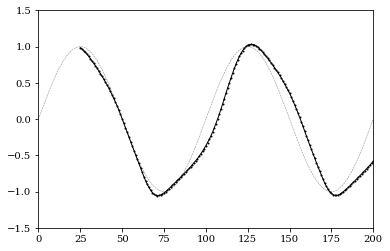

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping


if __name__ == '__main__':
    np.random.seed(123)
    tf.random.set_seed(123)

    '''
    1. データの準備
    '''
    def sin(x, T=100):
        return np.sin(2.0 * np.pi * x / T)

    def toy_problem(T=100, ampl=0.05):
        x = np.arange(0, 2*T + 1)
        noise = ampl * np.random.uniform(low=-1.0, high=1.0,
                                         size=len(x))
        return sin(x) + noise

    T = 100
    f = toy_problem(T).astype(np.float32)
    length_of_sequences = len(f)
    maxlen = 25

    x = []
    t = []

    for i in range(length_of_sequences - maxlen):
        x.append(f[i:i+maxlen])
        t.append(f[i+maxlen])

    x = np.array(x).reshape(-1, maxlen, 1)
    t = np.array(t).reshape(-1, 1)

    x_train, x_val, t_train, t_val = \
        train_test_split(x, t, test_size=0.2, shuffle=False)

    '''
    2. モデルの構築
    '''
    model = Sequential()
    model.add(SimpleRNN(50, activation='tanh',
                        kernel_initializer='glorot_normal',
                        recurrent_initializer='orthogonal'))
    model.add(Dense(1, activation='linear'))

    '''
    3. モデルの学習
    '''
    optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')

    es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       verbose=1)

    hist = model.fit(x_train, t_train,
                     epochs=1000, batch_size=100,
                     verbose=2,
                     validation_data=(x_val, t_val),
                     callbacks=[es])

    '''
    4. モデルの評価
    '''
    # sin波の予測
    sin = toy_problem(T, ampl=0.)
    gen = [None for i in range(maxlen)]

    z = x[:1]

    # 逐次的に予測値を求める
    for i in range(length_of_sequences - maxlen):
        preds = model.predict(z[-1:])
        z = np.append(z, preds)[1:]
        z = z.reshape(-1, maxlen, 1)
        gen.append(preds[0, 0])

    # 予測値を可視化
    fig = plt.figure()
    plt.rc('font', family='serif')
    plt.xlim([0, 2*T])
    plt.ylim([-1.5, 1.5])
    plt.plot(range(len(f)), sin,
             color='gray',
             linestyle='--', linewidth=0.5)
    plt.plot(range(len(f)), gen,
             color='black', linewidth=1,
             marker='o', markersize=1, markerfacecolor='black',
             markeredgecolor='black')
    # plt.savefig('output.jpg')
    plt.show()
